In [1]:
# magic function
%matplotlib inline

# Importing libraries
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from scipy import sparse
from sklearn import decomposition
from sklearn.preprocessing import Normalizer, MinMaxScaler, OrdinalEncoder

# Hiding warnings during display of plots
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("df_mature_mirna_sequences_features.csv")
data.head()

,A,C,G,U,AA,AC,AG,AU,CA,CC,...,UUGU,UUUA,UUUC,UUUG,UUUU,x_axis,y_axis,z_axis,gc_content,Species
0,5,0,8,9,0,0,4,1,0,0,...,1,0,0,0,0,4,-12,6,36.363636,Homo sapiens
1,5,6,1,9,1,2,0,2,1,0,...,0,0,1,0,0,-9,1,7,33.333333,Homo sapiens
2,3,9,3,7,0,1,2,0,1,3,...,0,0,1,0,0,-10,2,-2,54.545455,Homo sapiens
3,3,0,10,9,0,0,3,0,0,0,...,1,0,0,0,0,4,-16,2,45.454545,Homo sapiens
4,5,10,1,6,1,3,0,1,1,4,...,0,0,0,0,0,-10,8,0,50.000000,Homo sapiens


# Exploratory Data Analysis

## GC Content

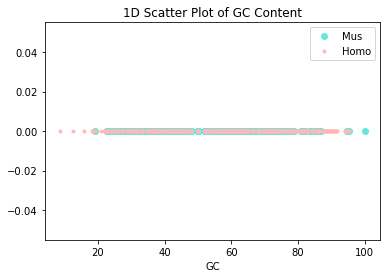

In [3]:
mus = data[data['Species'] == 'Mus musculus']
homo = data[data['Species'] == 'Homo sapiens']

gc_content = data.gc_content

plt.plot(mus['gc_content'], 
         np.zeros_like(mus['gc_content']),'o', 
         color='#67e6dc', 
         label="Mus", markersize=6)
plt.plot(homo['gc_content'], 
         np.zeros_like(homo['gc_content']),'o', 
         color='#ffb8b8', 
         label="Homo", markersize=3)

plt.legend()
plt.title('1D Scatter Plot of GC Content')
plt.xlabel('GC')
plt.show()

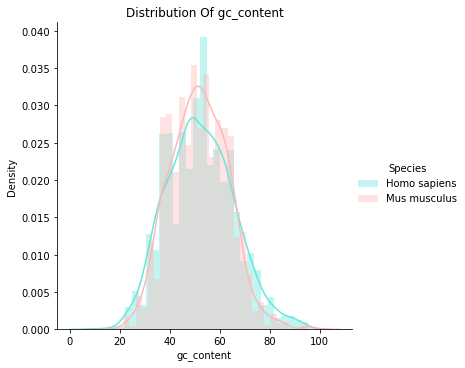

In [4]:
sns.FacetGrid(data, hue="Species",
              palette=['#67e6dc', '#ffb8b8'],
              size=5) \
   .map(sns.distplot, "gc_content") \
   .add_legend()

plt.title("Distribution Of gc_content")
plt.xlabel("gc_content")
plt.ylabel("Density")
plt.show()

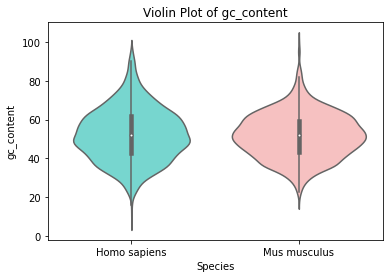

In [5]:
ax = sns.violinplot(x="Species", y="gc_content", 
                    data=data, 
                    palette=['#67e6dc', '#ffb8b8'],
                    scale="area")

plt.title("Violin Plot of gc_content")
plt.xlabel("Species")
plt.ylabel("gc_content")
plt.show()

In [6]:
y = np.array(data['Species'])
y = (OrdinalEncoder().fit_transform(y.reshape(-1, 1)))
y.shape

X = data.drop(['Species'], axis=1)
X = MinMaxScaler().fit_transform(X)

## AUGC - Monomers 

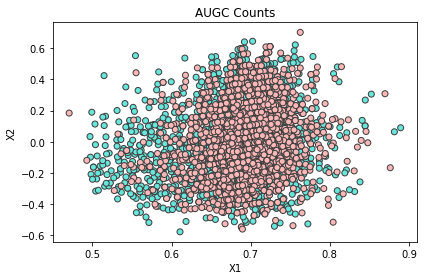

In [7]:
atgc_count = X[:, 0:4]

atgc_count = decomposition.TruncatedSVD(n_components=2).fit_transform(atgc_count)

binaryThemeDark = ListedColormap(['#67e6dc', '#ffb8b8'])
plt.scatter(atgc_count[:,0], atgc_count[:,1], 
            c=y, cmap=binaryThemeDark,
            edgecolor='#3d3d3d', linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('AUGC Counts')
plt.tight_layout()
plt.savefig("AUGC-Counts",dpi=300)
plt.show()

## AUGC - DiMers

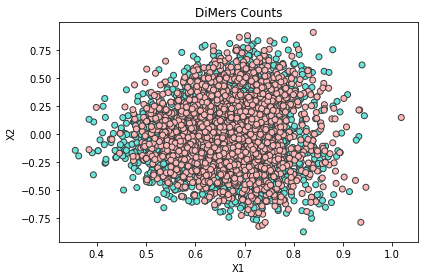

In [8]:
two_mers = (X[:, 4:20])

two_mers = decomposition.TruncatedSVD(n_components=2).fit_transform(two_mers)

binaryThemeDark = ListedColormap(['#67e6dc', '#ffb8b8'])
plt.scatter(two_mers[:,0], two_mers[:,1], 
            c=y, cmap=binaryThemeDark,
            edgecolor='#3d3d3d', linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('DiMers Counts')
plt.tight_layout()
plt.savefig("two_mers_counts",dpi=300)
plt.show()

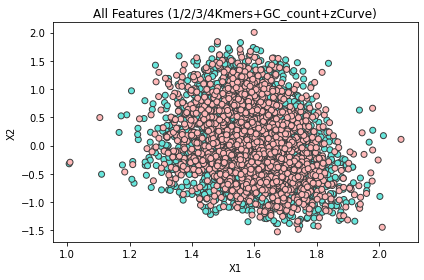

In [9]:
X_reduce = decomposition.TruncatedSVD(n_components=2).fit_transform(X)

binaryThemeDark = ListedColormap(['#67e6dc', '#ffb8b8'])
plt.scatter(X_reduce[:,0], X_reduce[:,1], c=y, cmap=binaryThemeDark, edgecolor='#3d3d3d', linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('All Features (1/2/3/4Kmers+GC_count+zCurve)')
plt.tight_layout()
plt.savefig("All-Features",dpi=300)
plt.show()